# Importing Necessary Dependencies

In [1]:
import os
import json
import time

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import joblib



import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

# Reading and Analysing Dataset

In [2]:
cropdf = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
cropdf.shape

(2200, 8)

In [4]:
cropdf.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
cropdf.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

#### Crops

In [6]:
print("Number of various crops: ", len(cropdf['label'].unique()))
print("List of crops: ", cropdf['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
cropdf['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
crop_summary = pd.pivot_table(cropdf,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# Visualizing the Crops Dataset

<h3 style='color:red'>Nitrogen Analysis</h3>

In [9]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color='red',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color='green',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


<h3 style='color:red'>Phosphorus Analysis</h3>

In [10]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color='red',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color='green',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


<h3 style='color:Red'>Potassium analysis</h3>

In [11]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color='red',
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color='green',
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


<h3 style='color:Red'>NPK ratio for rice, cotton, jute, maize, lentil </h3>

In [12]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()


<h3 style='color:Red'>NPK ratio for fruits</h3>

In [13]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()


In [14]:
crop_scatter = cropdf[(cropdf['label']=='rice') | 
                      (cropdf['label']=='jute') | 
                      (cropdf['label']=='cotton') |
                     (cropdf['label']=='maize') |
                     (cropdf['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h3 style='color:Red'>Correlation between different features </h3>

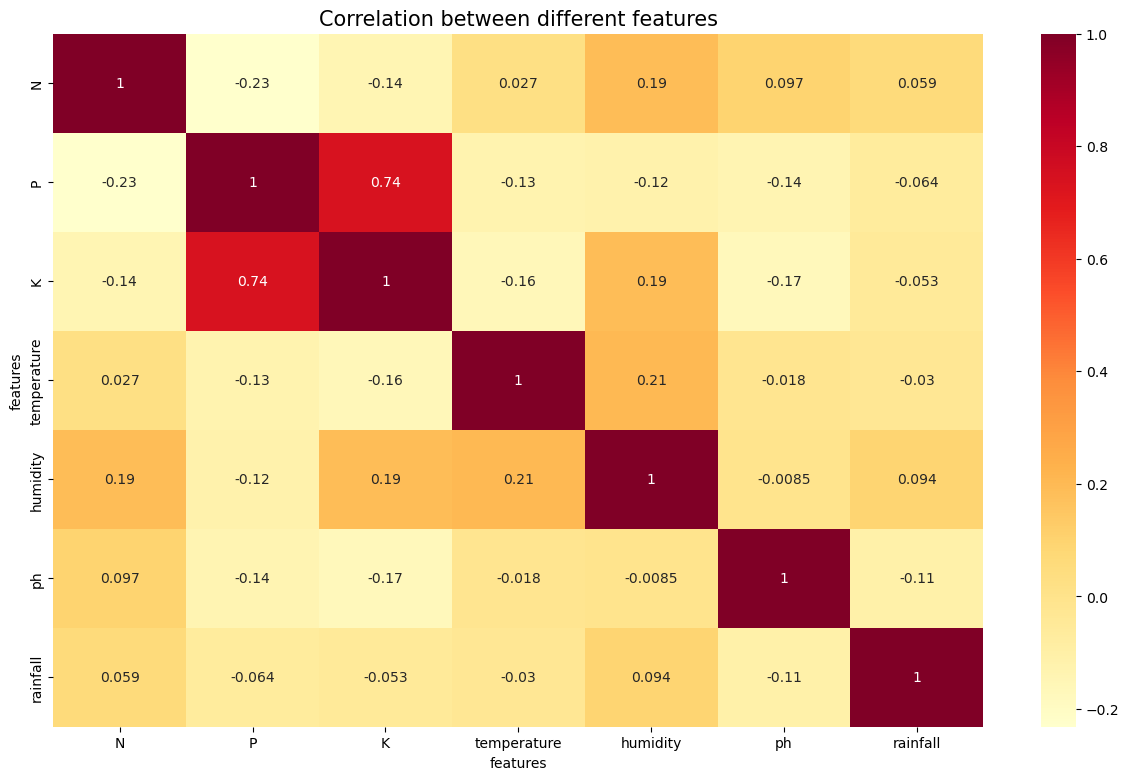

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(cropdf.corr(), annot=True,cmap='YlOrRd')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

<h1 style='color:blue'>Model Training and Testing</h1>

In [17]:
# build the lightgbm model
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer

In [18]:
TRAINING_PARAMETERS = {
    'logistic_reg': {'clf__max_iter': [15, 25, 50, 100, 500, 1000, 2000], 'clf__penalty': ['l2']},
    'gaussian_NB': {'clf__var_smoothing': [1e-17, 1e-15, 1e-12]},
    'svc': {'clf__C': [0.01, 0.04, 0.09, 0.15, 0.5, 1, 5, 10, 30, 100, 200], 'clf__kernel': ['rbf']},
    'rfc': {'clf__n_estimators': [50, 100, 175, 250], 'clf__max_features':['log2'], 'clf__max_depth': [25, 50, 100, 200], 'clf__min_samples_split': [1, 3, 5, 7]},
    'ada_boost': {'clf__n_estimators': [50, 100, 175, 250], 'clf__learning_rate': [0.005, 0.01, 0.05, 0.07, 0.1, 0.5]},
    'grad_boost': {'clf__n_estimators': [50, 100, 175, 250], 'clf__learning_rate': [0.01, 0.05, 0.1, 0.5], 'clf__max_depth': [2, 3, 5, 7]},
    'knn': {'clf__n_neighbors': [3, 5, 7, 9], 'clf__weights': ['uniform'], 'clf__leaf_size': [3, 5, 7, 9]},
#     'lgbm': {'clf__boosting_type': ['goss', 'gbdt'], 'clf__min_child_samples': [2, 3, 5], 'clf__n_estimators': [75, 100, 150, 200, 300]},
    'lgbm': {'clf__boosting_type': ['gbdt'], 'clf__min_child_samples': [2], 'clf__n_estimators': [200]},
    'tree': {'clf__max_depth': [70, 100, 150], 'clf__min_samples_split': [5, 10, 15]}
}


TRAINING_MODELS = list(TRAINING_PARAMETERS.keys())
print(TRAINING_MODELS)

['logistic_reg', 'gaussian_NB', 'svc', 'rfc', 'ada_boost', 'grad_boost', 'knn', 'lgbm', 'tree']


In [19]:
K_SPLITS = 5
N_REPEATS = 3

In [20]:

def Precision(y_true, y_pred, average = None):
    return precision_score(y_true, y_pred, zero_division=0, average = 'macro')

def F1(y_true, y_pred, average = None):
    return f1_score(y_true, y_pred, zero_division=0, average = 'macro')

def Recall(y_true, y_pred, average = None):
    return recall_score(y_true, y_pred, zero_division = 0, average = 'macro')

scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(Precision),
    "Recall": make_scorer(Recall),
    "F1_Score": make_scorer(F1),
}

In [21]:
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [22]:
class Training_Class():
    def __init__(self) -> None:
        self.num_samples = None
        self.best_models = {}
        self.results = {}
        self.train_data = None
        self.test_data = None
        self.results_df = pd.DataFrame()
        
        self.load_dataset()

        
        
        
#         self.training_params['pca__n_components'] = [50, 75, 100]
    def load_model(self, model_name):
        training_models = {
            'logistic_reg': LogisticRegression(),
            'gaussian_NB': GaussianNB(),
            'svc': SVC(probability = True),
            'rfc': RandomForestClassifier(),
            'ada_boost': AdaBoostClassifier(),
            'grad_boost': GradientBoostingClassifier(),
            'xg_boost': XGBClassifier(),
            'knn': KNeighborsClassifier(),
            'lgbm': LGBMClassifier(),
            'tree': DecisionTreeClassifier()
        }
        return training_models[model_name]

        
    def load_dataset(self):
        df = cropdf.sample(frac = 1, random_state = 7781)
        self.num_samples = len(df)
        self.train_data = df.iloc[:int(0.8 * self.num_samples), :]
        self.test_data = df.iloc[int(0.8 * self.num_samples):, :]
        return
    
    
        
    def train_model(self, model_name):
        df = self.train_data
        features, target = df.drop(columns = ['label']), df['label']
        print(f"\tTraining  Model_name- {model_name}")
        training_model = self.load_model(model_name)
        training_params = TRAINING_PARAMETERS[model_name]
        pipeline = Pipeline([('scaler', StandardScaler()), ('clf', training_model)])
        cv = RepeatedStratifiedKFold(n_splits = K_SPLITS, n_repeats = N_REPEATS, random_state = 7781)
        search = GridSearchCV(estimator = pipeline, param_grid = training_params, scoring = scorers, cv = cv, refit = 'Accuracy')
        search.fit(features, target)

        results = self.get_results(search, model_name)
        results['Distribution'] = target.value_counts()
        results['Model_Name'] = model_name
            
        self.best_models[model_name] = search.best_estimator_
        self.results[model_name] = results
        return
    
    def get_results(self, cv, model_name):
        results = cv.cv_results_
        params = results['params']
        best_params = cv.best_params_
        best_param_idx = params.index(best_params)
        return_dict = {}

        
        # column_names = ['Image_Modalities', 'Num_Samples', 'Num_Features', 'Model_Name', 'Parameters_Dict', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Auc_Roc', 'Specificity']

        
        for scorer in list(scorers.keys()):
            mean_key_ = f"mean_test_{scorer}"
            std_key_ = f"std_test_{scorer}"
            mean_score = "{:.3f}".format((results[mean_key_])[best_param_idx])
            std_score = "{:.3f}".format((results[std_key_])[best_param_idx])
            return_dict[scorer] = mean_score + "+-" + std_score
        
        return_dict['Model_Name'] = model_name
        
        self.results_df = self.results_df.append(return_dict, ignore_index = True)
            
        return return_dict
    

    def train_all_models(self):
        for model_name in TRAINING_MODELS:
            self.train_model(model_name)
        self.results_df.set_index('Model_Name', inplace=True)

In [23]:
import warnings
warnings.filterwarnings('ignore')

train_instance = Training_Class()
train_instance.train_all_models()

	Training  Model_name- logistic_reg
	Training  Model_name- gaussian_NB
	Training  Model_name- svc
	Training  Model_name- rfc
	Training  Model_name- ada_boost
	Training  Model_name- grad_boost
	Training  Model_name- knn
	Training  Model_name- lgbm
	Training  Model_name- tree


In [24]:
train_instance.results_df

,Accuracy,Precision,Recall,F1_Score
Model_Name,,,,
logistic_reg,0.969+-0.005,0.971+-0.005,0.970+-0.005,0.969+-0.005
gaussian_NB,0.996+-0.003,0.997+-0.003,0.996+-0.003,0.996+-0.003
svc,0.987+-0.005,0.987+-0.005,0.986+-0.005,0.987+-0.005
rfc,0.996+-0.003,0.996+-0.003,0.996+-0.003,0.996+-0.003
ada_boost,0.878+-0.031,0.871+-0.043,0.877+-0.031,0.858+-0.036
grad_boost,0.989+-0.006,0.990+-0.005,0.989+-0.006,0.989+-0.006
knn,0.973+-0.006,0.976+-0.004,0.973+-0.006,0.973+-0.006
lgbm,0.991+-0.005,0.992+-0.004,0.991+-0.005,0.991+-0.005
tree,0.989+-0.006,0.990+-0.006,0.989+-0.006,0.989+-0.006


In [25]:
evaluation_df = train_instance.results_df
for col_name in evaluation_df.columns:
    evaluation_df[col_name] = evaluation_df[col_name].apply(lambda x: float(x.split('+-')[0]))

In [26]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'#D8D8D8'}, font_scale = 1)

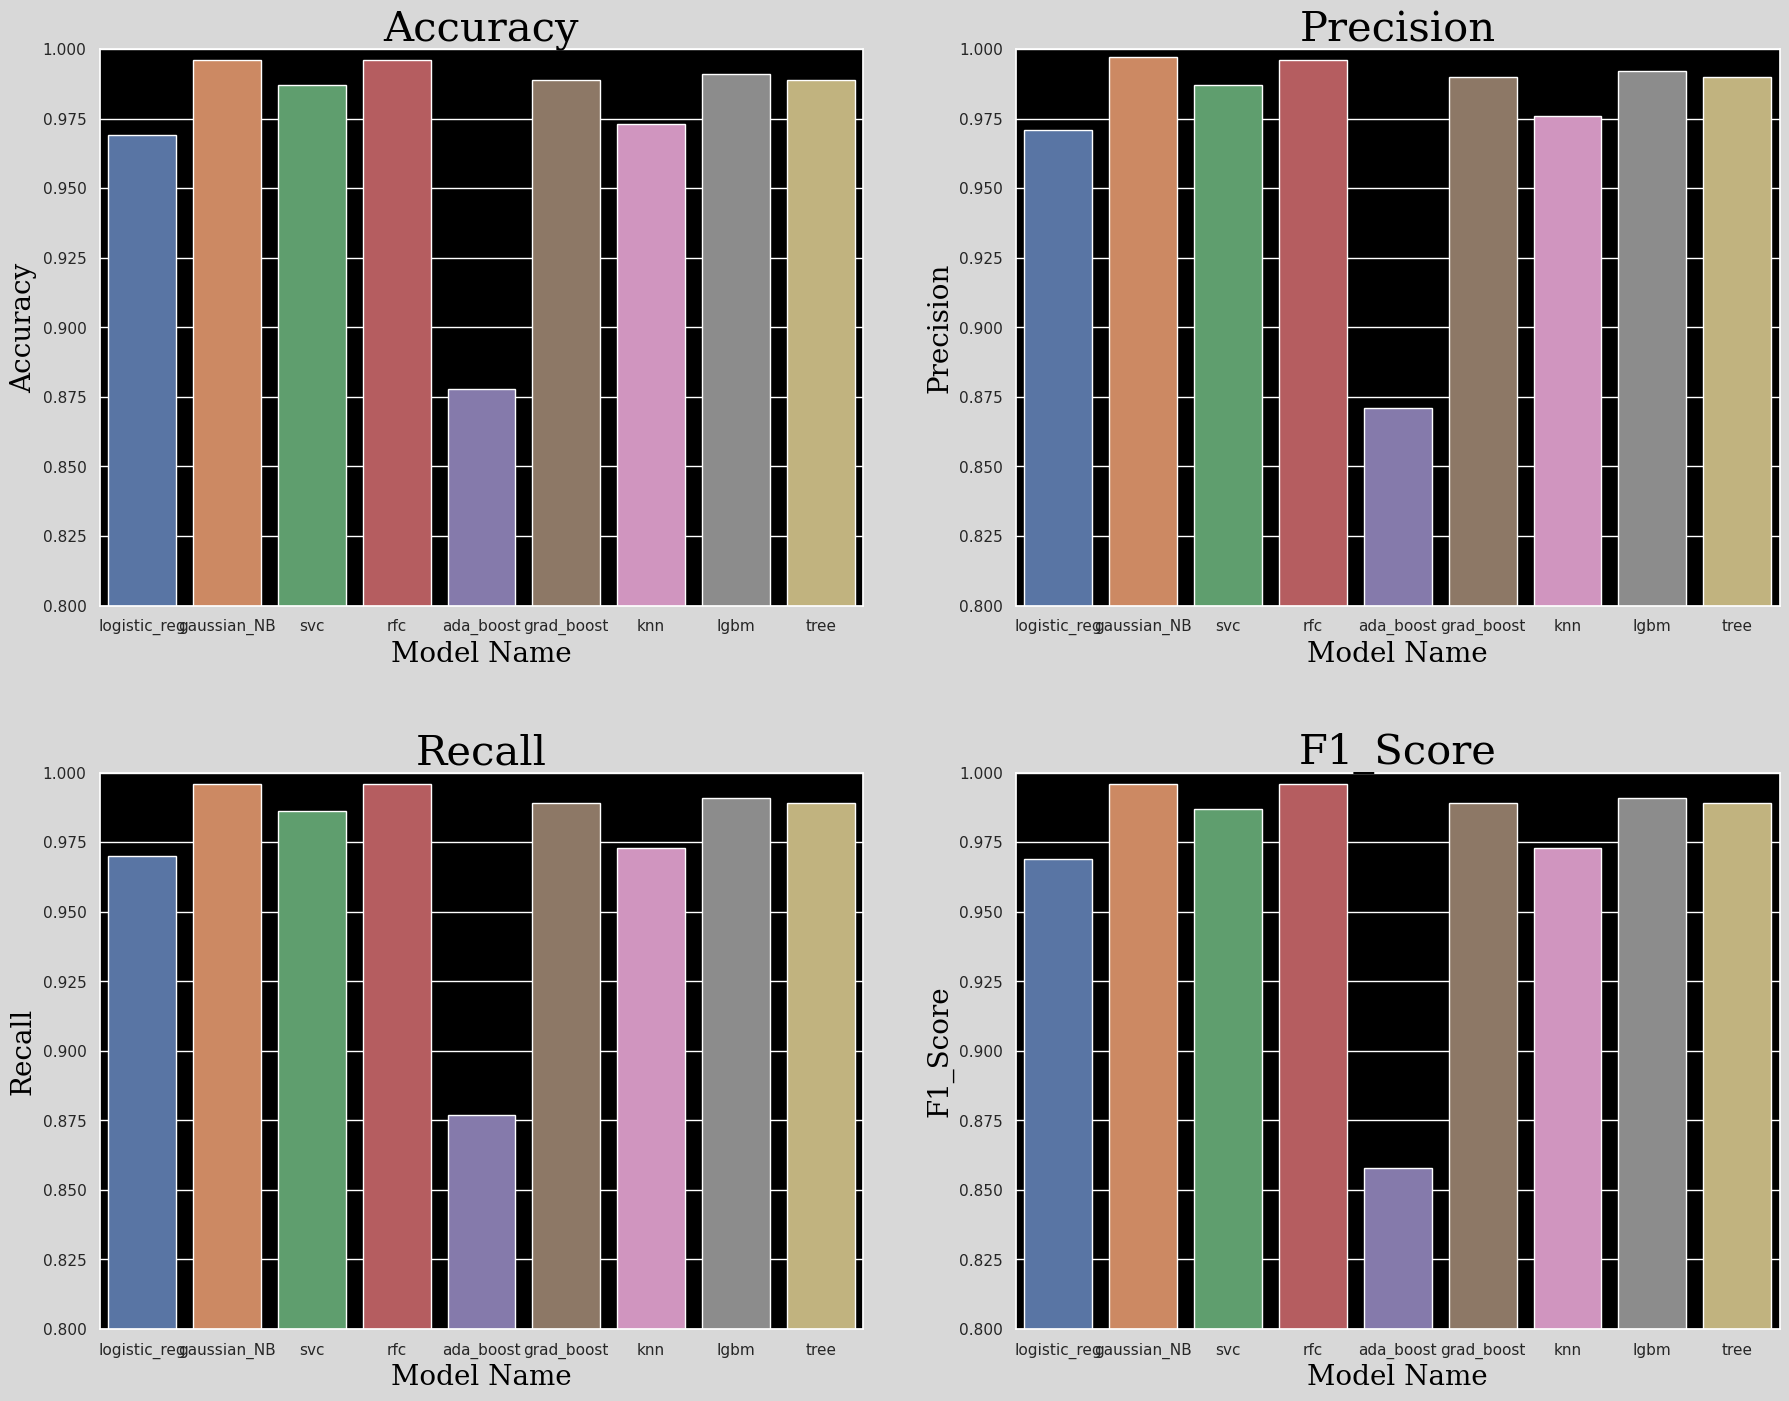

In [27]:
col_names = evaluation_df.columns
fig, axes = plt.subplots(2, 2)
fig.set_figheight(16)
fig.set_figwidth(21)
axarr = axes.flat
for idx, ax in enumerate(axarr):
    axis = sns.barplot(
        x = evaluation_df.index,
        y = evaluation_df[col_names[idx]],
        ax = ax
    )
    axis.set_title(col_names[idx], fontdict = font_title)
    axis.set_ylim(bottom = 0.8, top = 1.0)
    axis.set_xlabel("Model Name", fontdict = font)
    axis.set_ylabel(col_names[idx], fontdict = font)
plt.subplots_adjust(
left=0.1,
bottom = 0.1,
right=0.9,
top = 0.9,
wspace=0.2,
hspace = 0.3    
)
plt.savefig('Evaluation bar plots.jpeg')

In [28]:
joblib.dump(train_instance, "Crop Recommendation Trained.pkl")

['Crop Recommendation Trained.pkl']